# Практическая работа №1: Алгоритмы эффективного вычисления одночленов

Выполнил студент гр. 1304 Завражин Дмитрий. Вариант №34.

## Цель работы

Сформировать знания о работе алгоритмах вычисления одночленов за
минимальное число операций, привить навык использования систем компьютерной математики для реализации алгоритмов.

## Основные теоретические положения

В данной работе рассматривается ряд подходов к минимизации затрачиваемого на вычислению мономов количества операций, а также соответствующая оценка количества затрачиваемых при этом операций. 

### Используемые обозначения

При оценке затрачиваемого количества операций будут использоваться следующие операции:

* $\mathrm{\lambda}\!\left(n\right) = \left\lfloor\mathrm{lb}\!\left(n\right)\right\rfloor$ $-$ декрементированная длина бинарной записи степени $n$;
* $\mathrm{\nu}\!\left(n\right)$ $-$ соответствующий бинарной записи степени $n$ вес Хэмминга.

### Бинарный метод "SX"

Бинарный метод "SX" осуществляет возведение некоторого числа $x$ в степень $n$ согласно следующему алгоритму:

1. Степень $n$ представляется в бинарном виде, $n = \left\{1, a_{m-1}, \dots, a_1\right\}$, затем отбрасывается старший (равный $1$) бит;

2. В последовательности $\left\{a_{m-1}, \dots, a_1\right\}$ производится замена элементов $a_i$ следующим образом:
    * $a_i \rightarrow \mathrm{S}$ если $a_i = 0$;
    * $a_i \rightarrow \mathrm{SX}$ если $a_i = 1$.

3. Примем $\tilde x := x$. Проходя по полученной на предшествующем шаге последовательности элементов $\tilde a_i$, вычисления выполняются следующим образом:
    
    * $\tilde x := \tilde x \cdot \tilde x$ если $\tilde a_i = \mathrm{S}$;
    * $\tilde x := x \cdot \tilde x$ если $\tilde a_i = \mathrm{X}$.

После выполнения данных действий искомая степень $x^n$ находится в переменной $\tilde x$. Количество операций умножения при использовании бинарного метода равно $\mathrm{\lambda}\!\left(n\right) + \mathrm{\nu}\!\left(n\right) - 1$.

### Метод возведения справа налево

Метод возведения справа налево осуществляет возведение некоторого числа $x$ в степень $n$ согласно следующему алгоритму:

1. Сначала примем: $N := n$, $Y := 1$, $Z := x$.
2. Пока не поизойдёт выход из цикла выполняется следующее:
    * Если $N$ чётно, то $N := \left\lfloor\frac N2\right\rfloor$, $Z := Z \cdot Z$, выполняется переход к проверке $N$ на чётность;
    * Если же $N$ нечётно, то $N := \left\lfloor\frac N2\right\rfloor$, $Y := Y \cdot Z$. Затем если $N = 0$, то производится выход из цикла, иначе $Z := Z \cdot Z$ и выполняется переход к проверке $N$ на чётность.

После выполнения данных действий искомая степень $x^n$ находится в переменной $Y$. Количество операций умножения при использовании бинарного метода равно $\mathrm{\lambda}\!\left(n\right) + \mathrm{\nu}\!\left(n\right)$.

### Метод множителей

Метод множителей осуществляет возведение некоторого числа $x$ в степень $n$ согласно следующему рекурсивно описанному алгоритму:

1. Если степень $n > 1$ не является простым числом, то она представляется в виде $p \cdot q$, где $p$ -- наименьший простой множитель числа $n$, а $q > 1$. Тогда возведение в степень раскладывается на два шага: $x^n = \left(x^p\right)^q$;
2. Если степень $n > 1$ является простым числом, то возведение в степень раскладывается на два шага следующим образом: $x^n = x^{n - 1} \cdot x^1$;
3. Если $n = 1$, то искомая степень найдена. Это условие является критерием выхода из рекурсии.

### Дерево степеней

Дерево степеней строится согласно следующему алгоритму:
1. На нулевом уровне имеется лишь единственный (также являющийся корнем дерева) узел: $1$;
2. Уровень $i + 1$ строится следующим образом: для каждого узла $v$ к нему добавляются новые узлы $v + a_0$, $v + a_1$, $\dots$, $v + a_{i - 1}$ , если они не присутствуют в дереве где-либо ещё.

Таким образом дерево степеней может быть построено до требуемого уровня $k$.

## Постановка задачи

Реализовать алгоритмы вычисления мономов за минимальное число операций с использованием системы компьютерной алгебры SageMath, провести анализ алгоритмов. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы

### 1. Бинарный метод "SX"

Был реализован бинарный метод "SX". Его реализация была разбита на три функции:
* `sx_sequence(n)` -- строит состоящую из символов SX строку;
* `sx_exponentiation(x, sx)` -- осуществляет пошаговое возведениее в степень по заданной состоящей из символов SX строке;
* `sx_method(n)` -- запускает метод на переменной `x`, выводит результаты обоих предшествующих функций.

In [1]:
def sx_sequence(n):
    if int(n) != n or n < 0:
        raise ValueError('Unexpected exponent encountered')
    if n == 0:
        return ''
    return str(bin(n))[3:].replace('0', 'S').replace('1','SX')

In [2]:
def sx_exponentiation(x, sx):
    y = x
    steps = [(0, y)]  # iteration 0 is simply the original value
    for i, elem in enumerate(sx):
        y *= x if elem == 'X' else y
        steps += [(i + 1, y)]
    return steps

In [3]:
def sx_method(n):
    sx = sx_sequence(n)
    print(str(n) + ')', sx, end=' ')
    [print(e, end=' ') for e in sx_exponentiation(var('x'), sx)]
    print()

Применим данную реализацию ко всем целым степеням меньше $100$:

In [4]:
[sx_method(i) for i in range(1, 100)]; pass

1)  (0, x) 
2) S (0, x) (1, x^2) 
3) SX (0, x) (1, x^2) (2, x^3) 
4) SS (0, x) (1, x^2) (2, x^4) 
5) SSX (0, x) (1, x^2) (2, x^4) (3, x^5) 
6) SXS (0, x) (1, x^2) (2, x^3) (3, x^6) 
7) SXSX (0, x) (1, x^2) (2, x^3) (3, x^6) (4, x^7) 
8) SSS (0, x) (1, x^2) (2, x^4) (3, x^8) 
9) SSSX (0, x) (1, x^2) (2, x^4) (3, x^8) (4, x^9) 
10) SSXS (0, x) (1, x^2) (2, x^4) (3, x^5) (4, x^10) 
11) SSXSX (0, x) (1, x^2) (2, x^4) (3, x^5) (4, x^10) (5, x^11) 
12) SXSS (0, x) (1, x^2) (2, x^3) (3, x^6) (4, x^12) 
13) SXSSX (0, x) (1, x^2) (2, x^3) (3, x^6) (4, x^12) (5, x^13) 
14) SXSXS (0, x) (1, x^2) (2, x^3) (3, x^6) (4, x^7) (5, x^14) 
15) SXSXSX (0, x) (1, x^2) (2, x^3) (3, x^6) (4, x^7) (5, x^14) (6, x^15) 
16) SSSS (0, x) (1, x^2) (2, x^4) (3, x^8) (4, x^16) 
17) SSSSX (0, x) (1, x^2) (2, x^4) (3, x^8) (4, x^16) (5, x^17) 
18) SSSXS (0, x) (1, x^2) (2, x^4) (3, x^8) (4, x^9) (5, x^18) 
19) SSSXSX (0, x) (1, x^2) (2, x^4) (3, x^8) (4, x^9) (5, x^18) (6, x^19) 
20) SSXSS (0, x) (1, x^2) (2, x^4) (3

Как видно из полученных результатов, данная реализация корректно находит запрашиваемую степень бинарным методом "SX".

Для трёх произвольных рассмотренных значений проверим корректность теоретической оценки числа операций:

$n = 9: \mathrm{\lambda}\!\left(9\right) = 3, \mathrm{\nu}\!\left(9\right) = 2; \mathrm{\lambda}\!\left(9\right) + \mathrm{\nu}\!\left(9\right) - 1 = 4$

$n = 37: \mathrm{\lambda}\!\left(37\right) = 5, \mathrm{\nu}\!\left(37\right) = 3; \mathrm{\lambda}\!\left(9\right) + \mathrm{\nu}\!\left(37\right) - 1 = 7$

$n = 91: \mathrm{\lambda}\!\left(91\right) = 6, \mathrm{\nu}\!\left(91\right) = 5; \mathrm{\lambda}\!\left(9\right) + \mathrm{\nu}\!\left(91\right) - 1 = 10$

Для осуществления программной проверки реализуем функции $\mathrm{\lambda}\!\left(n\right)$ и $\mathrm{\nu}\!\left(n\right)$, а также функцию количества затрачиваемых операций:

In [5]:
def lambda_(n):
    return len(str(bin(n))) - 3

In [6]:
def nu_(n):
    return sum([int(digit) for digit in str(bin(n))[2:]])

In [7]:
def sx_multiplication_count(n):
    return len(sx_exponentiation(var('x'), sx_sequence(n))) - 1

Для проверки корректности теоретической оценки количества операций были реализованы следующие функции:

In [8]:
def sx_test(n):
    theoretical_estimate = lambda_(n) + nu_(n) - 1
    actual_amount = sx_multiplication_count(n)
    return theoretical_estimate == actual_amount

In [9]:
def sx_verbose_test(n):
    theoretical_estimate = lambda_(n) + nu_(n) - 1
    actual_amount = sx_multiplication_count(n)
    print(str(n) + ')', theoretical_estimate, actual_amount, end=" ")
    print(theoretical_estimate == actual_amount)
    return theoretical_estimate == actual_amount

Проведём явную проверку для некоторых степеней:

In [10]:
results = ['Равенство не соблюдается', 'Равенство соблюдается']
results[all([sx_verbose_test(n) for n in range(30, 51)])]

30) 7 7 True
31) 8 8 True
32) 5 5 True
33) 6 6 True
34) 6 6 True
35) 7 7 True
36) 6 6 True
37) 7 7 True
38) 7 7 True
39) 8 8 True
40) 6 6 True
41) 7 7 True
42) 7 7 True
43) 8 8 True
44) 7 7 True
45) 8 8 True
46) 8 8 True
47) 9 9 True
48) 6 6 True
49) 7 7 True
50) 7 7 True


'Равенство соблюдается'

Проведём проверку не превышающих пятидесяти тысяч для степеней:

In [11]:
results[all([sx_test(n) for n in range(1, 50000)])]

'Равенство соблюдается'

По полученным данным можно сделать вывод о соответствии теоретической оценки количества операций наблюдаемой на практике действительности, по крайней мере на рассматриваемых значениях степени $n$.

#### Вывод
Был реализован бинарный метод "SX", выполнена проверка корректности для некоторых степеней и теоретической оценки затрачиваемого количества операций. Была отмечена простота метода в реализации и прямое соответствие затрачиваемого количества операций умножения количеству итераций в основном цикле.

### 2. Метод возведения справа налево

Был реализован метод возведения справа налево. Его реализация была разбита на две функции:
* `rl_exponentiation(x, n)` -- осуществляет пошаговое возведениее в степень по бинарному методу возведения справа налево;
* `rl_method(n)` -- запускает метод на переменной `x`, в читабельном виде выводит результат в по каждой итерации.

In [12]:
def rl_sequence(x, n):
    if int(n) != n or n < 0:
        raise ValueError('Unexpected exponent encountered')
    if n == 0:
        return [(0, n, 1, x)]
    iteration, N, Y, Z, multiplication_counter = 0, n, 1, x, 0
    iterations = [(iteration, N, Y, Z)]
    while True:
        iteration += 1
        if N % 2 != 0:
            N = floor(N / 2)
            Y = Y * Z
            multiplication_counter += 1
            if N == 0:
                break
        else:
            N = floor(N / 2)
        Z = Z * Z
        multiplication_counter += 1
        iterations += [(iteration, N, Y, Z)]
    return iterations + [(iteration, N, Y, Z)], multiplication_counter

In [13]:
def rl_method(n):
    iterations = rl_sequence(var('x'), n)[0]
    for (i, N, Y, Z) in iterations:
        print(f"# = {i}\nN = {N}\nY = {Y}\nZ = {Z}\n")

Рассмотрим несколько примеров:

In [14]:
rl_method(9)

# = 0
N = 9
Y = 1
Z = x

# = 1
N = 4
Y = x
Z = x^2

# = 2
N = 2
Y = x
Z = x^4

# = 3
N = 1
Y = x
Z = x^8

# = 4
N = 0
Y = x^9
Z = x^8



Протокол работы алгоритма при $n = 9$:


| № | $X$ | $Y$ | $Z$ |
| --- | --- |--- |--- |
| $0$ | $9$ | $1$ | $x$ |
| $1$ | $4$ | $x$ | $x^2$ |
| $2$ | $2$ | $x$ | $x^4$ |
| $3$ | $1$ | $x$ | $x^8$ |
| $4$ | $0$ | $x^9$ | $x^8$ |

In [15]:
rl_method(37)

# = 0
N = 37
Y = 1
Z = x

# = 1
N = 18
Y = x
Z = x^2

# = 2
N = 9
Y = x
Z = x^4

# = 3
N = 4
Y = x^5
Z = x^8

# = 4
N = 2
Y = x^5
Z = x^16

# = 5
N = 1
Y = x^5
Z = x^32

# = 6
N = 0
Y = x^37
Z = x^32



Протокол работы алгоритма при $n = 37$:


| № | $X$ | $Y$ | $Z$ |
| --- | --- |--- |--- |
| $0$ | $37$ | $1$ | $x$ |
| $1$ | $18$ | $x$ | $x^2$ |
| $2$ | $9$ | $x$ | $x^4$ |
| $3$ | $4$ | $x^5$ | $x^8$ |
| $4$ | $2$ | $x^5$ | $x^{16}$ |
| $5$ | $1$ | $x^5$ | $x^{32}$ |
| $6$ | $0$ | $x^{37}$ | $x^{32}$ |

In [16]:
rl_method(91)

# = 0
N = 91
Y = 1
Z = x

# = 1
N = 45
Y = x
Z = x^2

# = 2
N = 22
Y = x^3
Z = x^4

# = 3
N = 11
Y = x^3
Z = x^8

# = 4
N = 5
Y = x^11
Z = x^16

# = 5
N = 2
Y = x^27
Z = x^32

# = 6
N = 1
Y = x^27
Z = x^64

# = 7
N = 0
Y = x^91
Z = x^64



Протокол работы алгоритма при $n = 91$:



| № | $X$ | $Y$ | $Z$ |
| --- | --- |--- |--- |
| $0$ | $91$ | $1$ | $x$ |
| $1$ | $45$ | $x$ | $x^2$ |
| $2$ | $22$ | $x^3$ | $x^4$ |
| $3$ | $11$ | $x^3$ | $x^8$ |
| $4$ | $5$ | $x^{11}$ | $x^{16}$ |
| $5$ | $2$ | $x^{27}$ | $x^{32}$ |
| $6$ | $1$ | $x^{27}$ | $x^{64}$ |
| $7$ | $0$ | $x^{91}$ | $x^{64}$ |

Для трёх произвольных рассмотренных значений проверим корректность теоретической оценки числа операций:

$n = 9: \mathrm{\lambda}\!\left(9\right) = 3, \mathrm{\nu}\!\left(9\right) = 2; \mathrm{\lambda}\!\left(9\right) + \mathrm{\nu}\!\left(9\right) = 5$

$n = 37: \mathrm{\lambda}\!\left(37\right) = 5, \mathrm{\nu}\!\left(37\right) = 3; \mathrm{\lambda}\!\left(9\right) + \mathrm{\nu}\!\left(37\right) = 8$

$n = 91: \mathrm{\lambda}\!\left(91\right) = 6, \mathrm{\nu}\!\left(91\right) = 5; \mathrm{\lambda}\!\left(9\right) + \mathrm{\nu}\!\left(91\right) = 11$

Для проверки корректности теоретической оценки количества операций программным путём были реализованы следующие функции:

In [17]:
def rl_multiplication_count(n):
    return rl_sequence(var('x'), n)[1]

In [18]:
def rl_test(n):
    theoretical_estimate = lambda_(n) + nu_(n)
    actual_amount = rl_multiplication_count(n)
    return theoretical_estimate == actual_amount

In [19]:
def rl_verbose_test(n):
    theoretical_estimate = lambda_(n) + nu_(n)
    actual_amount = rl_multiplication_count(n)
    print(str(n) + ')', theoretical_estimate, actual_amount, end=" ")
    print(theoretical_estimate == actual_amount)
    return theoretical_estimate == actual_amount

Проведём явную проверку для некоторых степеней:

In [20]:
results[all([rl_verbose_test(n) for n in range(30, 51)])]

30) 8 8 True
31) 9 9 True
32) 6 6 True
33) 7 7 True
34) 7 7 True
35) 8 8 True
36) 7 7 True
37) 8 8 True
38) 8 8 True
39) 9 9 True
40) 7 7 True
41) 8 8 True
42) 8 8 True
43) 9 9 True
44) 8 8 True
45) 9 9 True
46) 9 9 True
47) 10 10 True
48) 7 7 True
49) 8 8 True
50) 8 8 True


'Равенство соблюдается'

Проведём проверку для меньших пятидесяти тысяч степеней:

In [21]:
results[all([rl_test(n) for n in range(1, 50000)])]

'Равенство соблюдается'

По полученным данным можно сделать вывод о соответствии теоретической оценки количества операций наблюдаемой на практике действительности, по крайней мере на рассматриваемых значениях степени $n$.

#### Вывод

Был реализован бинарный метод возведения справа налево, выполнена проверка корректности для некоторых степеней и теоретической оценки затрачиваемого количества операций. Было отмечено, что метод требует на одну операцию больше по сравнению с бинарным методом "SX", а на последнем шаге $i$ значение $Z = x^{2^{i - 1}}$. Если учесть нулевой шаг, то тогда для $n$, на котором алгоритм осуществляет $k$ шагов, значение $Z = x^{2^{k - 2}}$.

### 3. Сравнение бинарного метода "SX" и метода возведения справа налево

Исходя из проверенных выше на практике соотношений для количества операций умножения можно наблюдать, что количество операций умножения при использовании бинарного метода "SX" равно $\mathrm{\lambda}\!\left(n\right) + \mathrm{\nu}\!\left(n\right) - 1$, а при использовании метода возведения справа налево -- $\mathrm{\lambda}\!\left(n\right) + \mathrm{\nu}\!\left(n\right)$, из чего следует большая выгодность по времени бинарного метода "SX".

Тем не менее, использованный наивный подход к реализации бинарного метода "SX" имеет большую сложность по памяти, так как он опирается на хранение всей строки целиком с последующим её обходом, а метод возведения справа налево требует всего лишь трёх переменных, то есть имеет сложность по памяти $\mathrm{O}\!\left(1\right)$, а не $\mathrm{O}\!\left(\mathrm{\lambda}\!\left(n\right)\right)$. Тем не менее, так как это является особенностью реализации, а сам алгоритм возможно реализовать на бинарных сдвигах, эта особенность не вляется недостатком самого алгоритма.

Таким образом, можно сделать вывод о большей целесообразности бинарного метода "SX" по сравнению с методом возведения справа налево.

### 4. Метод множителей

Метод множителей был выполнен вручную для $n = 9, 37, 73, 91$.

Для $n = 9$:

$x^{9} = \left(x^3\right)^{3}$

$x^{3} = x^2\cdot x$ (применяется дважды -- к $x$  и к $x^3$)

$x^{2} = x\cdot x$

Тогда получается следующая последовательность: $x, x^2, x^3, x^6, x^9$.

Итого 4 операции, как и в бинарном методе "SX"

Для $n = 33$:

$x^{33} = \left(x^3\right)^{11}$

$x^{11} = x^{10} \cdot x$

$x^{10} = \left(x^2\right)^{5}$

$x^{5} = x^{4} \cdot x$

$x^{4} = \left(x^2\right)^{2}$

$x^{3} = x^2 \cdot x$

$x^{2} = x\cdot x$

Тогда получается следующая последовательность: $x, x^2, x^3, x^6, x^{12}, x^{24}, x^{30}, x^{33}$.

Итого 7 операций -- на одну больше, чем в бинарном методе "SX"

Для $n = 37$:

$x^{37} = x^{36}\cdot x$

$x^{36} = \left(x^6\right)^{6}$

$x^{6} = \left(x^2\right)^{3}$

$x^{3} = x^2 \cdot x$

$x^{2} = x\cdot x$

Тогда получается следующая последовательность: $x, x^2, x^4, x^6, x^{12}, x^{24}, x^{36}, x^{37}$.

Итого 7 операций, как и в бинарном методе "SX"

Для $n = 91$:

$x^{91} = \left(x^7\right)^{13}$

$x^{13} = x^{12}\cdot x$

$x^{12} = \left(x^3\right)^{4}$

$x^{7} = x^{6}\cdot x$

$x^{6} = \left(x^2\right)^{3}$

$x^{4} = \left(x^2\right)^{2}$

$x^{3} = x^{2}\cdot x$

$x^{2} = x\cdot x$

Тогда получается следующая последовательность: $x, x^2, x^4, x^6, x^7, x^{14}, x^{21}, x^{42}, x^{84}, x^{91}$.

Итого 9 операций -- на одну меньше, чем в бинарном методе "SX"

#### Вывод

Был рассмотрен метод множителей для четырёх значений $n$. Было отмечено, что в зависимости от выбора $n$ данный метод может по сравнению с бинарным методом "SX" затрачивать как большее, так и меньшее количество операций больше, причём были найдены примеры как для отклонений в обе стороны, так и для случаев, когда они равны. Вкупе с большей друдоёмкостью реализации можно заключить, что он уступает бинарному методу "SX".

### 5. Метод дерева степеней

Был реализован метод возведения справа налево. Его реализация была разбита на две функции:
* `build_paths(depth)` -- строит дерево степеней уровень за уровнем, возвращает построенные пути от корня к степеням;
* `show_tree(n, paths)` -- отрисовывает построенное дерево с выделением пути от корня к искомой степени.

In [22]:
def build_paths(depth):
    previous_level = [1]
    paths = {1: previous_level}
    for _ in range(depth):
        current_level = []
        for node in previous_level:
            for path_node in paths[node]:
                new_node = path_node + node
                if new_node not in paths.keys():
                    current_level += [new_node]
                    paths[new_node] = paths[node] + [new_node]
                
        previous_level = current_level
    return paths

In [23]:
def show_tree(n, paths):
    tree = {}
    for node, path in paths.items():
        if len(path)  < 2:
            continue
        elif path[-2] not in tree.keys():
            tree[path[-2]] = [node]
        else:
            tree[path[-2]] += [node]
    return Graph(tree).plot(
            layout='tree', tree_root=1,
            vertex_color='white',
            vertex_colors={'#bf616a': paths[n]},
        
    )

Построим такие деревья для некоторых степеней:

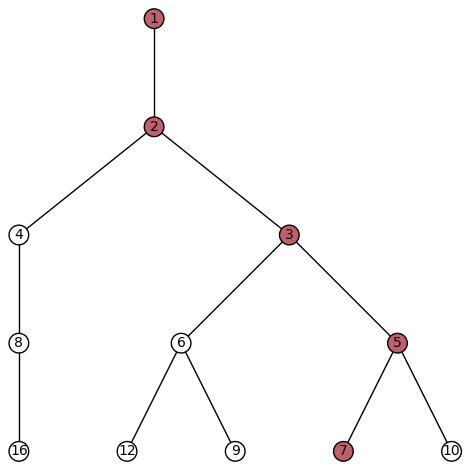

In [24]:
show_tree(7, build_paths(4))

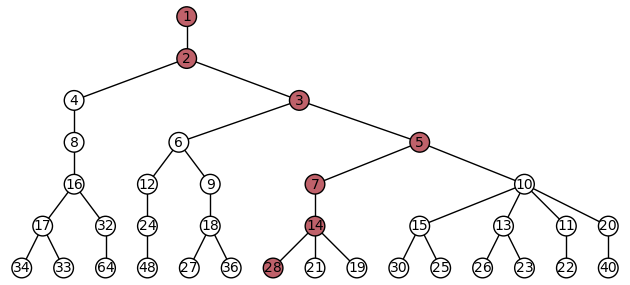

In [25]:
show_tree(28, build_paths(6))

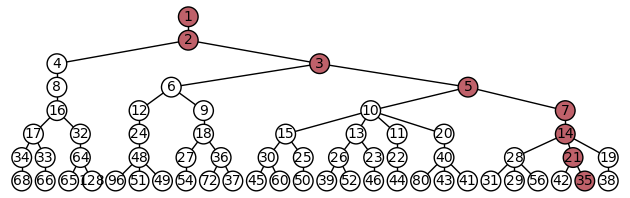

In [26]:
show_tree(35, build_paths(7))

Проведём проверку того, что бинарный метод "SX" не превосходит данный, то есть количество операций бинарного метода не меньше, чем у этого.

In [27]:
def tree_multiplication_count(n, paths):
    return len(paths[n]) - 1

In [28]:
def tree_test(n, paths):
    sx_performance = sx_multiplication_count(n)
    tree_performance = tree_multiplication_count(n, paths)
    return sx_performance >= tree_performance

In [29]:
def tree_verbose_test(n, paths):
    sx_performance = sx_multiplication_count(n)
    tree_performance = tree_multiplication_count(n, paths)
    print(str(n) + ')', sx_performance, end=" ")
    print('>' if sx_performance > tree_performance else\
          '=' if sx_performance == tree_performance else '<', end=" ")
    print(tree_performance)
    return sx_performance >= tree_performance

In [30]:
# a large tree precomputed to speed up subsequent pathfinding
large_tree = build_paths(int(log(50000, 1.6)))

Проведём явную проверку для некоторых степеней:

In [31]:
comparison = ['Неравенство не соблюдается', 'Неравенство соблюдается']
comparison[all([tree_verbose_test(n, large_tree) for n in list(range(30, 51)) + [91]])]

30) 7 > 6
31) 8 > 7
32) 5 = 5
33) 6 = 6
34) 6 = 6
35) 7 = 7
36) 6 = 6
37) 7 = 7
38) 7 = 7
39) 8 > 7
40) 6 = 6
41) 7 = 7
42) 7 = 7
43) 8 > 7
44) 7 = 7
45) 8 > 7
46) 8 > 7
47) 9 > 8
48) 6 = 6
49) 7 = 7
50) 7 = 7
91) 10 > 9


'Неравенство соблюдается'

Для большего количества степеней проведём проверку, что бинарный метод "SX" не превосходит данный:

In [32]:
comparison[all([tree_test(n, large_tree) for n in range(1, 50000)])]

'Неравенство соблюдается'

По полученному выводу можно заключить, что это верно по меньшей мере для степеней ниже пятидесяти тысяч.

#### Вывод

Был реализован алгоритм построения дерева степеней, выполнена проверка корректности для некоторых степеней и установлено преимущество данного метода возведения в степеньпо затрачиваемому количеству операций умножения над бинарным методом "SX" (а также в силу транзитивности отношения сравнения и над методом возведения справа налево, так как он затрачивает на одно действие больше по сравнению с бинарным методом). Кроме того, на рассмотренных примерах можно заметить, что метод дерева степеней в лучше метода множителей, по меньшей мере так как в нём наихудшее возможное количество операций меньше (см. при $n = 33$), а меньшее по сравнению с бинарным методом количество операций наблюдается для большего количества степеней.

Также средствами пакета SageMath была реализована отрисовка дерева с выделением цветом входящих в искомую последовательность вершин.

### 6. Модификация дерева степеней

Реализованная но прошлом шаге функция `build_paths(depth)` была модифицирована таким образом, чтобы при построении каждого нового уровня дерева при удлиннении уже существующих путей узлы добалялись в обратном порядке. Результатом внесения данного изменения является тело функции  `build_other_paths(depth)`:

In [33]:
def build_other_paths(depth):
    previous_level = [1]
    paths = {1: previous_level}
    for _ in range(depth):
        current_level = []
        for node in previous_level:
            for path_node in paths[node][::-1]:
                new_node = path_node + node
                if new_node not in paths.keys():
                    current_level += [new_node]
                    paths[new_node] = paths[node] + [new_node]
                
        previous_level = current_level
    return paths

Построим такие деревья для некоторых степеней:

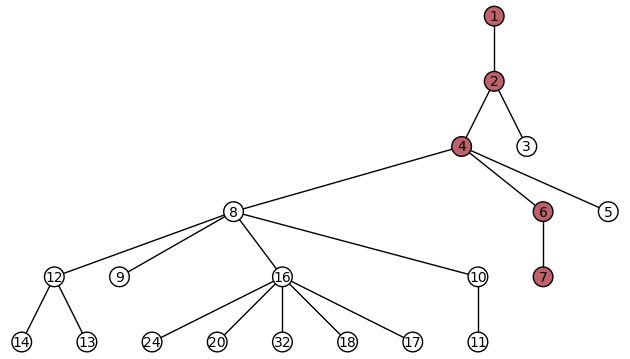

In [34]:
show_tree(7, build_other_paths(5))

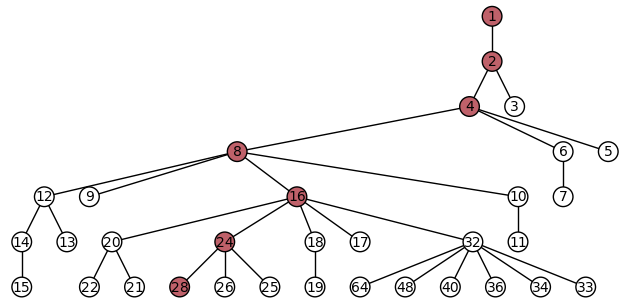

In [35]:
show_tree(28, build_other_paths(6))

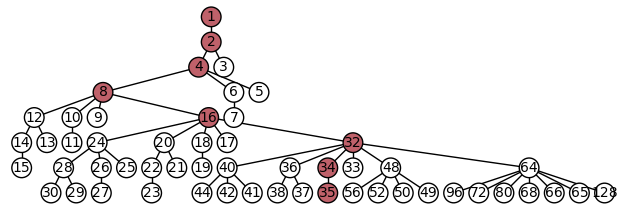

In [36]:
show_tree(35, build_other_paths(7))

Для осуществления сравнения данного метода с бинарным методом была реализована функция `test_tree_equivalence(k)`, а затем она была вызвана с достаточно большим параметром `k`:

In [37]:
def test_tree_equivalence(k):
    paths = build_other_paths(int(log(k, 1.3)))
    for n in range(1, k):
        count_1 = tree_multiplication_count(n, paths)
        count_2 = sx_multiplication_count(n)
        if count_1 != count_2:
            print(n, count_1, count_2)
            return False
    return True

In [38]:
results[test_tree_equivalence(1000)]

'Равенство соблюдается'

Как можно наблюдать, равенство количества операций умножения для модифицированного таким образом дерева и бинарного метода "SX" наблюдается по меньшей мере для степеней ниже тысячи.

#### Вывод

Был реализован алгоритм построения модифицированного дерева степеней, выполнена проверка корректности для некоторых степеней и установлена эквивалентность данного метода возведения в степеньпо по затрачиваемому количеству операций умножения над бинарным методом "SX".

## Выводы

Были освоены алгоритмические подходы к вычислению одночленов при условии минимизации количества операций умножения, отточены навыки работы с математическим пакетом SageMath, в том числе для осуществления символьных вычислений, а также реализации с его помощью алгоритмов на языке программирования Python.

Был реализован ряд методов возведения в степень: бинарный метод, метод возведения в степень справа налево, метод дерева степеней в двух вариациях; метод множителей был рассмотрен без реализации. Реализованные алгоритмы были проверены на корректность их работы и верность теоретических оценок количества операций умножения.

Просле реализации дерева убывающих степеней было произведено сравнение с бинарным методом, о них сделано заключение о равенстве количества операций умножения
.